# Polynomial Features

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


## Dataset
Were just going to create some random dataset for this purpose

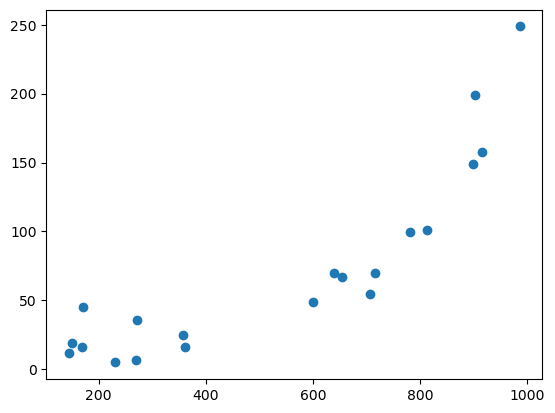

In [13]:
np.random.seed(3)
num_samples = 20
X = np.random.choice(np.linspace(0, 1000, 10000), num_samples).reshape(-1, 1)
y = 20 + 2**(0.008 * X)
y += np.random.normal(scale=15, size=y.shape)
plt.scatter(X, y)
plt.show()


## Regressor Model
Were gonna use a simple linear regression model for this, and train it on the data.

In [5]:
rg = LinearRegression()
rg.fit(X, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Lets produce a test set that just covers the space from 0 to 1000 so we can make a nice plot of what our model thinks our initial function looks like

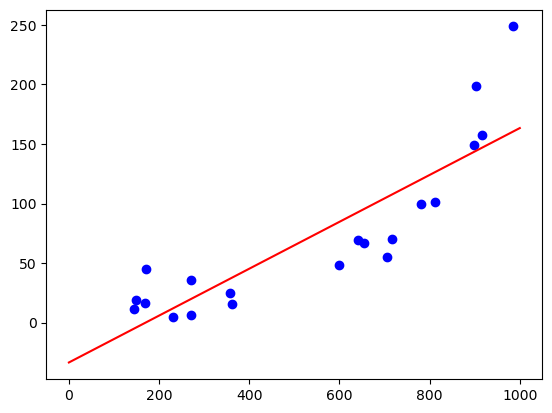

In [6]:

x_ls = np.linspace(0, 1000, 1000).reshape(-1, 1)
y_pred = rg.predict(x_ls)

plt.scatter(X, y, color="blue")
plt.plot(x_ls, y_pred, color="red")
plt.show()


So that regressor obviously doesnt work that well on the data. The data looks like some quadratic or exponential growth (in fact we know since we made the data in the first cells of this notebook), that can be really fit well with a straight line.

However, if we know this beforehand, we could actually go there and just say we train this on the logarithm of y instead of y.

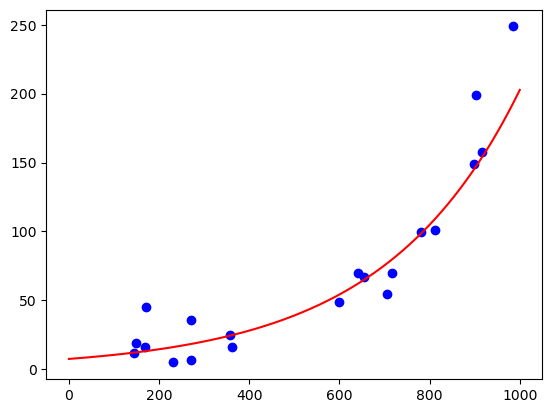

In [9]:
rg = LinearRegression()
rg.fit(X, np.log(y))

x_ls = np.linspace(0, 1000, 1000).reshape(-1, 1)
y_pred = rg.predict(x_ls)

plt.scatter(X, y, color="blue")
plt.plot(x_ls, np.exp(y_pred), color="red")
plt.show()


Wouldnt it be nice if we could give the model the possibility to fit stuff like this (mostly) by itself?

## Polynomial feature

Create new features from polynomial combinations of the original features. E.g. if a and b are inputs, the new features generated by polynomial features of degree 2 are [1, a, b, a^2, ab, b^2]


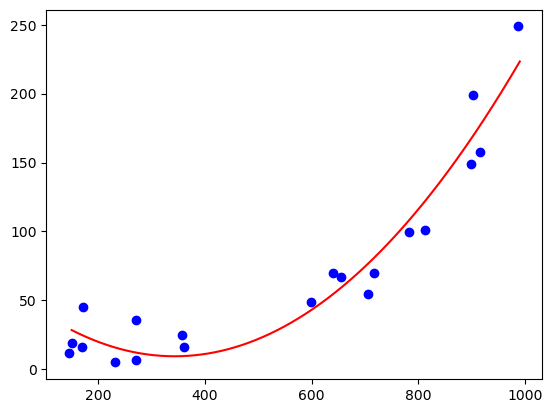

In [11]:

polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
linear_regression = LinearRegression()
    
pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
pipeline.fit(X, y)

x_ls = np.linspace(150, 990, 1000).reshape(-1, 1)
y_pred = pipeline.predict(x_ls)

plt.scatter(X, y, color="blue")
plt.plot(x_ls, y_pred, color="red")
plt.show()


Not a perfect fit, but way better than a straight line.

**Exercise** *: Increase the number of degrees of the polynomial and see what happens to the models prediction / estimate of the function.

**Exercise** **: Why is the effect that happens on increased degrees probably a bad thing?

**Exercise** **: Try other models than linear regression without the polynomial expansion. What simple sklearn model (other than linear regression) has something like this already built in?

**Exercise** *: What happens if we go beyond our trainng sets range (to the left or right, or both).


**Exercise** *: Whats the downside(s) of polynomial expansion?